**Phase Space Visualization**  
Consider a one dimensional binary cellular automata model with neighbourhood radius $r = 2$. We assume the spacce is made of 9 cells with periodic boundary conditions (i.e., the space is a ring made of 9 cells). In this setting, the size of the phasee space is just $2^9 = 512$, so this is easy to visualize.   
In order to enumerate all possible configurations, it is convenient to define functions that map a specific configuration of the CA to a unique configuration ID number, and vice versa.  

C:\Users\Omika\AppData\Local\Temp/ipykernel_27292/565715783.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum(cf[L-1-i] * 2**i for i in range(L))


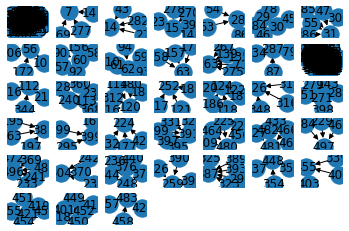

In [4]:
from pylab import *
import networkx as nx

g = nx.DiGraph()

r = 2
L = 9

def config(x):
    return [1 if x & 2**i > 0 else 0 for i in range(L-1, -1, -1)]

def cf_number(cf):
    return sum(cf[L-1-i] * 2**i for i in range(L))

def update(cf):
    nextcf = [0] * L
    for x in range(L):
        count = 0
        for dx in range(-r, r+1):
            count += cf[(x+dx) % L]
        nextcf[x] = 1 if count > (2*r +1) * 0.5 else 0
    return nextcf

for x in range(2**L):
    g.add_edge(x, cf_number(update(config(x))))
    
ccs = [cc for cc in nx.connected_components(g.to_undirected())]
n = len(ccs)
w = int(ceil(sqrt(n)))
h = int(ceil(n/w))
for i in range(n):
    subplot(h, w, i+1)
    nx.draw(nx.subgraph(g, ccs[i]), with_labels=True)
    
show()